In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set(style='whitegrid')

In [3]:
df_train = pd.read_json(open('work/dataset/train_sent_perplexity.json').read(),
                        orient='records',
                        lines=True)

In [4]:
df_train

,qanta_id,text,entity,text_unit,sentence_index,perplexity
0,0,After this character relates a story about how...,Queequeg,sentence,0,47.352257
1,0,"This ""sea Prince of Wales"" leaves his home by ...",Queequeg,sentence,1,117.491554
2,0,A door is broken down in Mrs. Hussey's establi...,Queequeg,sentence,2,69.562935
3,0,He is first encountered in the Spouter-Inn whe...,Queequeg,sentence,3,121.669533
4,0,"For 10 points, name this native of Rokovoko an...",Queequeg,sentence,4,176.051712
...,...,...,...,...,...,...
577194,190624,"In this novel, the titular character has a son...",Anna_Karenina,sentence,0,47.542835
577195,190624,Dolly's sister Kitty eventually marries Konsta...,Anna_Karenina,sentence,1,125.855560
577196,190624,""" The protagonist's husband refuses to conside...",Anna_Karenina,sentence,2,90.210884
577197,190624,"In the end, she feels that Vronsky has lost in...",Anna_Karenina,sentence,3,27.414867


In [5]:
df_train.loc[df_train['sentence_index'] > 6, 'sentence_index'] = 6

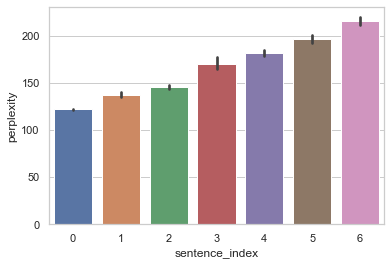

In [6]:
ax = sns.barplot(x="sentence_index", y="perplexity", data=df_train)

In [7]:
df_wiki = pd.read_json(open('work/dataset/wiki_sent_blingfire_perplexity.json').read(),
                       orient='records',
                       lines=True)

In [8]:
df_wiki

,text,entity,text_unit,paragraph_index,sentence_index,perplexity
0,Eric Clifford Ambler OBE (28 June 1909 – 22 Oc...,Eric_Ambler,sentence,0,0,59.214432
1,He also worked as a screenwriter.,Eric_Ambler,sentence,0,1,34.641697
2,Ambler used the pseudonym Eliot Reed for books...,Eric_Ambler,sentence,0,2,143.607910
3,Ambler was born in London into a family of ent...,Eric_Ambler,sentence,1,0,28.886574
4,Both parents also worked as music hall artists.,Eric_Ambler,sentence,1,1,339.975037
...,...,...,...,...,...,...
3308068,"Larger size origami paper, usually 6x6 inches,...",One_thousand_origami_cranes,sentence,6,1,77.885918
3308069,"Tinbergen is a Dutch surname, and may refer to:",Tinbergen,sentence,0,0,96.596947
3308070,This is a list of castles in the Eastern Medit...,List_of_Crusader_castles,sentence,0,0,29.792355
3308071,For crusader castles in Poland and the Baltic ...,List_of_Crusader_castles,sentence,0,1,111.894127


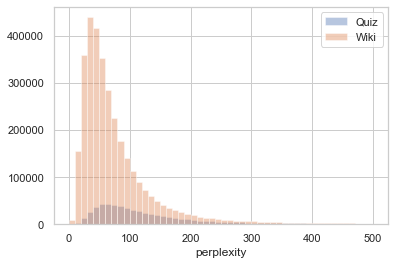

In [9]:
sns.distplot(df_train['perplexity'],
             kde=False,
             hist_kws={"range":(0,500)},
             label='Quiz')
sns.distplot(df_wiki['perplexity'],
             kde=False,
             hist_kws={"range":(0,500)},
             label='Wiki')
plt.legend()

In [10]:
pd.set_option('display.max_colwidth', 500)
df_wiki.sort_values('perplexity').head(300000).tail(10)

,text,entity,text_unit,paragraph_index,sentence_index,perplexity
779974,"Brutus was cremated, and his ashes were sent to his mother, Servilia.",Marcus_Junius_Brutus_the_Younger,sentence,14,1,24.263239
1027247,"The use of the term ""Lucifer"" was also taken up by the French ceremonial magician Eliphas Levi, who has been described as a ""Romantic Satanist"".",Satanism,sentence,33,0,24.263245
1831433,It is clear that the enzymes necessary for recombination are present in mammalian cells.,Mitochondrion,sentence,63,4,24.263264
412490,"In the English language, the capitalized form of ""God"" continues to represent a distinction between monotheistic ""God"" and ""gods"" in polytheism.",God,sentence,6,0,24.263279
2350503,"While at the helm of the People's Republic of Hungary, Kádár pushed for an improvement in the standard of living.",János_Kádár,sentence,3,0,24.263309
296783,"Yet before the duel could take place, Richard II decided to banish Henry from the kingdom (with the approval of Henry's father, John of Gaunt) to avoid further bloodshed.",Henry_IV_of_England,sentence,7,3,24.263361
1787577,"Winnipeg is the seat of government, home to the Legislative Assembly of Manitoba and the Provincial Court.",Manitoba,sentence,2,1,24.263369
1819612,"In 60 BC, Caesar, Crassus, and Pompey formed a political alliance that dominated Roman politics for several years.",Julius_Caesar,sentence,1,0,24.263369
63138,"The Macedonians asked him to accede to the throne of Macedon when their king, Ptolemy Keraunos, whose army was defeated in the Gallic invasion of Greece, was captured and beheaded by the Gauls.",Pyrrhic_War,sentence,39,2,24.263390
2874736,"Glycine is a colorless, sweet-tasting crystalline solid.",Glycine,sentence,1,0,24.263414


In [11]:
df_wiki.corr('spearman')

,paragraph_index,sentence_index,perplexity
paragraph_index,1.000000,-0.007793,0.005005
sentence_index,-0.007793,1.000000,0.081838
perplexity,0.005005,0.081838,1.000000
